In [1]:
from psycopg2 import connect
from modules.banda_larga import Banda_larga
from modules.conector_postgree import Interface_db_postgree
from modules.conector_cassandra import Interface_db_cassandra
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import psycopg2
from psycopg2.extras import execute_values

In [21]:

def chunk(dataframe, size):
    
    for i in range(0, len(dataframe), size): 
        yield dataframe[i:i + size]

In [22]:
lendo = Banda_larga(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\Banda_larga\Acessos_Banda_Larga_Fixa_2021.csv")
lendo.tratamento_geral()
df_tv_assinatura = lendo.get_resultado()
print('tratado')
print(df_tv_assinatura.info())
   

tratado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767901 entries, 0 to 4767900
Data columns (total 14 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Ano                    int64 
 1   Mês                    int64 
 2   Grupo Econômico        object
 3   Empresa                object
 4   CNPJ                   int64 
 5   Porte da Prestadora    object
 6   UF                     object
 7   Município              object
 8   Código IBGE Município  int64 
 9   Faixa de Velocidade    object
 10  Tecnologia             object
 11  Meio de Acesso         object
 12  Tipo de Pessoa         object
 13  Acessos                int64 
dtypes: int64(5), object(9)
memory usage: 509.3+ MB
None


In [23]:
chunked_banda_larga = chunk(df_tv_assinatura, 50000)

In [24]:
con = psycopg2.connect(user='postgres', password='Eugostode@55', host='localhost', database='telecomunicacao')
cursor = con.cursor()
print('conexao')

conexao


In [25]:

for df in chunked_banda_larga:
    try:
        data = np.array(df)
        list_postgre = []
        for item in data:
            value = tuple(item)
            list_postgre.append(value)  
        # list_postgre = str(list_postgre)[1:-1]
        sql = f"INSERT INTO banda_larga (ano, mes, Grupo_Economico, Empresa, CNPJ, porte, UF, Municipio, Codigo_IBGE_Municipio,Faixa_Velocidade, Tecnologia, Meio_Acesso, Tipo_Pessoa, Acesso) values %s;"
        execute_values(cursor, sql, list_postgre)
        con.commit()
        print('inerindo')
    except Exception as e:
        print("Erro ao inserir dados ", str(e))


inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo
inerindo


In [26]:
conect_post = Interface_db_postgree('postgres','Eugostode@55', 'localhost', 'telecomunicacao')

In [28]:
dados_tv_assinatura = conect_post.select(query="select t1.*,  t2.uf, t2.municipio, t2.codigo_ibge_municipio, t3.tecnologia,t3.faixa_velocidade,t3.meio_acesso, t4.tipo_pessoa, t4.acesso  from EmpresaBandaLarga t1 inner join LocalidadeBandaLarga t2  on t2.id_banda = t1.id_banda  inner join TecnologiaBandaLarga t3 on t3.id_banda = t2.id_banda inner join AcessosBandaLarga t4 on t4.id_banda = t3.id_banda;")
df_tv_assinatura = pd.DataFrame(dados_tv_assinatura)
a = df_tv_assinatura.info()
print(a)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767901 entries, 0 to 4767900
Data columns (total 15 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       int64 
 1   1       int64 
 2   2       int64 
 3   3       object
 4   4       object
 5   5       int64 
 6   6       object
 7   7       object
 8   8       object
 9   9       int64 
 10  10      object
 11  11      object
 12  12      object
 13  13      object
 14  14      int64 
dtypes: int64(6), object(9)
memory usage: 545.6+ MB
None


In [1]:
conect_cassa = Interface_db_cassandra('telecomunicacoes') 

NameError: name 'Interface_db_cassandra' is not defined

In [1]:
from cassandra.query import BatchStatement
query = """
    INSERT INTO banda_larga (
        id_banda,
        ano,
        mes,
        grupo_economico,
        empresa,
        cnpj ,
        porte_da_prestadora,
        uf,
        municipio,
        codigo_ibge_municipio ,
        faixa_de_velocidade,
        tecnologia,
        meio_de_acesso,
        tipo_de_pessoa,
        acessos 
    ) values (
        ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
    )
"""

In [50]:
insert = conect_cassa.connector().prepare(query)
chunked_df = chunk(df_tv_assinatura, 1000)
for df in chunked_df:
    batch = BatchStatement()
    for _, row in df.iterrows():
        batch.add(insert, tuple(row))
    print(">> executando batch")
    conect_cassa.inserir(batch)
print(">> dados inseridos")
    
print("inseriu tudo")

>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch


In [5]:
from cassandra.cluster import Cluster, ProfileManager
conect_cassa = Cluster()
session = conect_cassa.connect("telecomunicacoes")


In [6]:
query = "SELECT * FROM banda_larga;"
a = session.execute(query) 

In [7]:
lista = []
for i in a:
    lista.append(i)
b = pd.DataFrame(lista)   
print(b)

         id_banda  acessos   ano            cnpj  codigo_ibge_municipio  \
0         4494115       41  2021   6312970000109                4218004   
1         1792034      179  2021  23972364000139                2806701   
2         3607449        1  2021  40432544000147                3165701   
3          302602       17  2021    336701000104                2112209   
4         3819940        1  2021  76535764000143                4203600   
...           ...      ...   ...             ...                    ...   
4767896   4233535        1  2021  76535764000143                1100288   
4767897   1220022        1  2021   6243107000147                3547809   
4767898   2403942      107  2021   9092988000130                3540200   
4767899   2860684        2  2021  33000118000179                2927903   
4767900   1376241        1  2021   2558157000162                3530300   

                                            empresa faixa_de_velocidade  \
0                      N

In [54]:
b['mes'] = b['mes'].astype(str, errors = 'raise')
df_mes = b.loc[b['mes'] == '10']

In [55]:
df_mes.sort_values(by=['id_banda'], ascending=False, inplace=True)
Cabo_Metalico = df_mes.loc[df_mes["meio_de_acesso"] == 'Cabo Metálico']
Cabo_Coaxial = df_mes.loc[df_mes["meio_de_acesso"] == 'Cabo Coaxial']
Fibra = df_mes.loc[df_mes["meio_de_acesso"] == 'Fibra']
Radio = df_mes.loc[df_mes["meio_de_acesso"] == 'Rádio'] 
Satélite = df_mes.loc[df_mes["meio_de_acesso"]== 'Satélite']

dataframe_Cabo_Metalico = Cabo_Metalico.groupby("uf").sum()
dataframe_Cabo_Metalico.reset_index(inplace = True)
dataframe_cabo_coaxial = Cabo_Coaxial.groupby("uf").sum()
dataframe_cabo_coaxial.reset_index(inplace = True)
dataframe_Fibra = Fibra.groupby("uf").sum()
dataframe_Fibra.reset_index(inplace = True)
dataframe_Radio = Radio.groupby("uf").sum()
dataframe_Radio.reset_index(inplace = True)
dataframe_Satélite = Satélite.groupby("uf").sum()
dataframe_Satélite.reset_index(inplace = True)

C:\Users\isa66\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,uf,id_banda,acessos,ano,cnpj,codigo_ibge_municipio
0,AC,19166795,17467,125302,3615543424009940,74423968
1,AL,26901376,66297,175827,4951968731013746,235264227
2,AM,24184794,200104,163701,4901492481013063,105510843
3,BA,86688159,128974,580027,12290497369044410,839125766
4,CE,71977473,98773,464830,8466954884035398,530144331


In [49]:
import numpy as np
import matplotlib.pyplot as plt

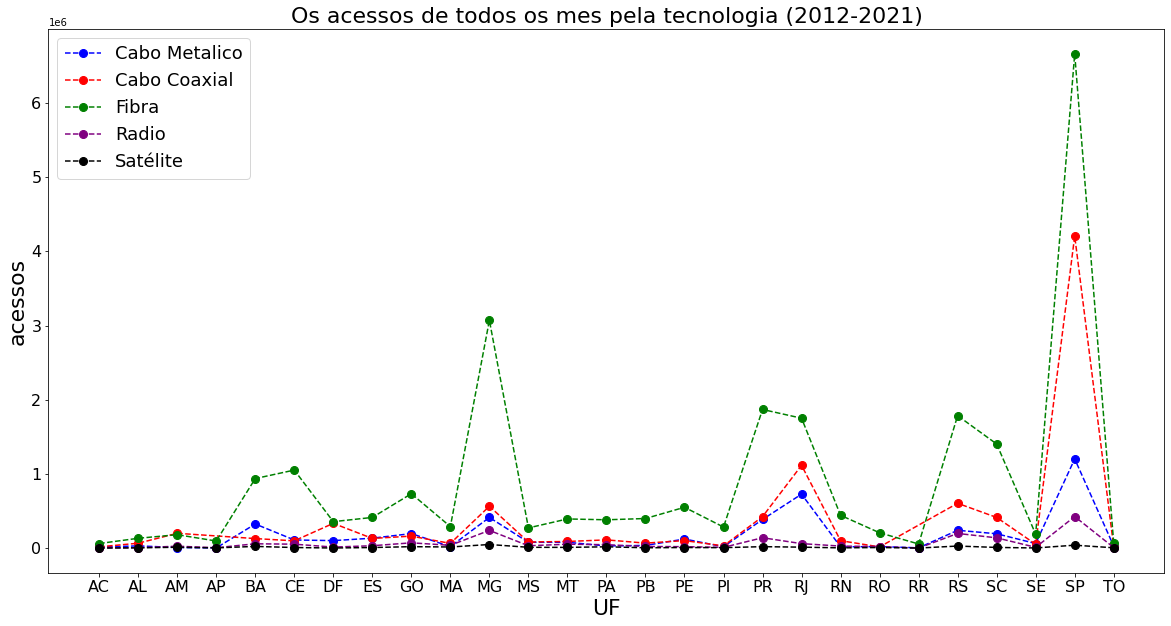

In [57]:

plt.figure(figsize=(20,10))
plt.plot(dataframe_Cabo_Metalico["uf"], dataframe_Cabo_Metalico["acessos"], linestyle='--', marker='o', color = 'blue', markersize = 8)
plt.plot(dataframe_cabo_coaxial["uf"], dataframe_cabo_coaxial["acessos"], linestyle='--', marker='o', color = 'red', markersize = 8)
plt.plot(dataframe_Fibra["uf"], dataframe_Fibra["acessos"], linestyle='--', marker='o', color = 'green', markersize = 8)
plt.plot(dataframe_Radio["uf"], dataframe_Radio["acessos"], linestyle='--', marker='o', color = 'purple', markersize = 8)
plt.plot(dataframe_Satélite["uf"], dataframe_Satélite["acessos"], linestyle='--', marker='o', color = 'black', markersize = 8)
plt.title("Os acessos de todos os mes pela tecnologia (2012-2021)", fontsize=22)
plt.xlabel("UF", fontsize=22)
plt.ylabel("acessos", fontsize=22)
plt.legend(['Cabo Metalico', 'Cabo Coaxial', 'Fibra', 'Radio', 'Satélite'], fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()

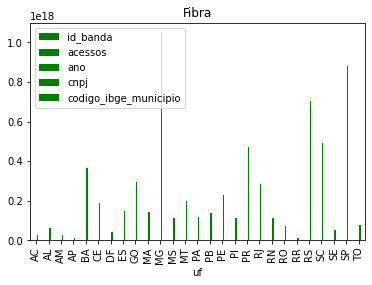

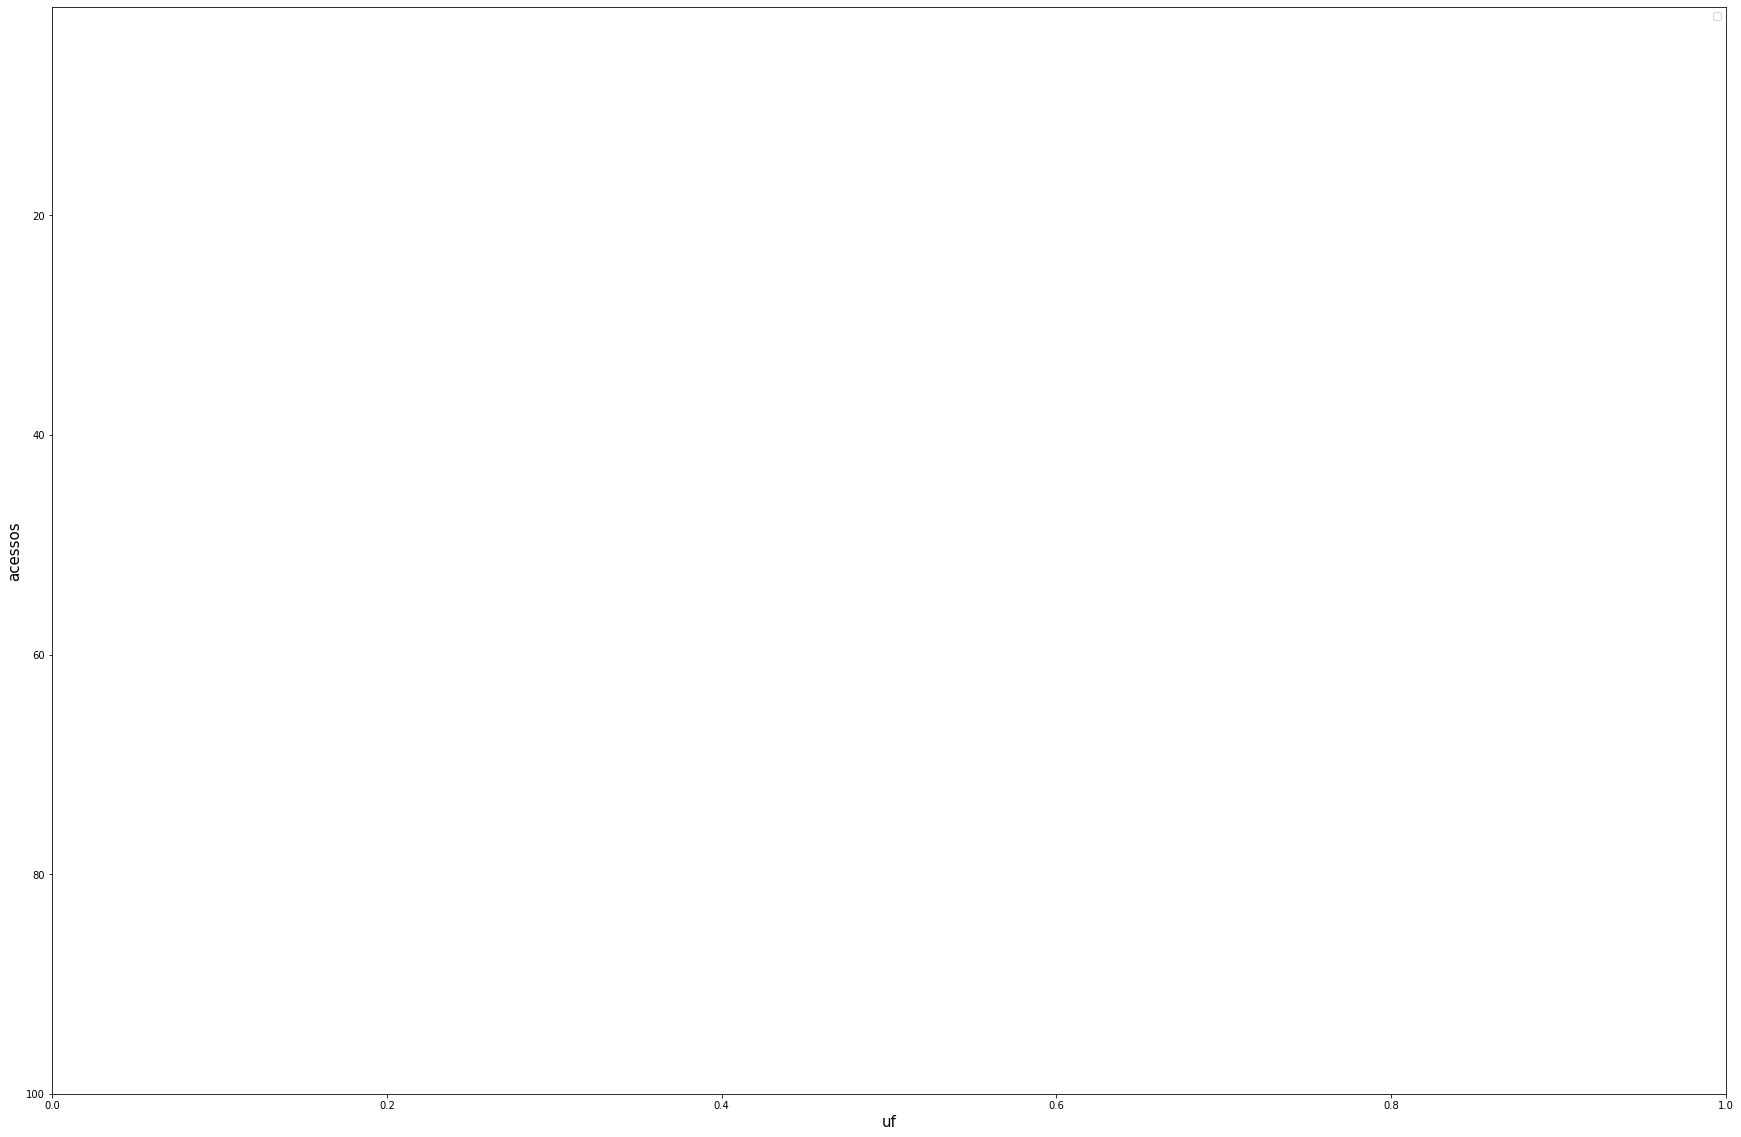

In [62]:

dataframe_Fibra.plot(x='uf', kind='bar', title='Fibra',color = 'green')
plt.ylim(100)
plt.xlabel("uf", fontsize=15)
plt.ylabel("acessos", fontsize=15)
plt.legend(['acessos'])
# dataframe_Cabo_Coxial.plot(x='regiao', kind='bar', title='CABO COXIAL')
# plt.ylim(0,5)
# plt.xlabel("regiao", fontsize=14)
# plt.ylabel("moradores", fontsize=14)
# plt.legend(['Acesso'])
# dataframe_tres_g.plot(x='regiao', kind='bar', title='3G',color = 'blue')
# plt.ylim(100)
# plt.xlabel("regiao", fontsize=14)
# plt.ylabel("moradores", fontsize=14)
# plt.legend(['moradores'])
# dataframe_quatro_g.plot(x='regiao', kind='bar', title='4G',color = 'grey')
# plt.ylim(100)
# plt.xlabel("regiao", fontsize=14)
# plt.ylabel("moradores", fontsize=14)
# plt.legend(['moradores'])
# dataframe_tres_quatro_g.plot(x='regiao', kind='bar', title='3G e 4G',color = 'black')
# plt.ylim(100)
# plt.xlabel("regiao", fontsize=14)
# plt.ylabel("moradores", fontsize=14)
# plt.legend(['moradores'])
# dataframe_todos_g.plot(x='regiao', kind='bar', title='todo G', color = 'darkblue')
# plt.ylim(100)
# plt.xlabel("regiao", fontsize=14)
# plt.ylabel("moradores", fontsize=14)
# plt.legend(['moradores'])